In [52]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load orders dataset.
orders = pd.read_csv('olist_order_items_dataset.csv')
# Load products items dataset.pd.read_csv('/kaggle/input/br
products = pd.read_csv('olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv('product_category_name_translation.csv')

In [54]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [55]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [56]:
# Print products header.
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
# Print products info.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [58]:
# Print translations header.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [59]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [60]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")

# Print English names.
products['product_category_name_english']

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

# Convert product IDs to product category names.**

In [61]:
# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

# Print orders header.
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [62]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])
# Print number of unique items.
len(orders['product_id'].unique())

32328

In [63]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

71

# Construct transactions from order and product data**

In [64]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Print example.
example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [65]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Print example.
example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

# Map orders to transactions.



In [66]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("order_id").product_category_name_english.unique()

# Print transactions header.
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75          [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

In [67]:
transactions.tail()

order_id
fffc94f6ce00a00581880bf54a75a037               [housewares]
fffcd46ef2263f404302a634eb57f7eb    [computers_accessories]
fffce4705a9662cd70adb13d4a31832d           [sports_leisure]
fffe18544ffabc95dfada21779c9644f    [computers_accessories]
fffe41c64501cc87c801fd61db3f6244           [bed_bath_table]
Name: product_category_name_english, dtype: object

<AxesSubplot:>

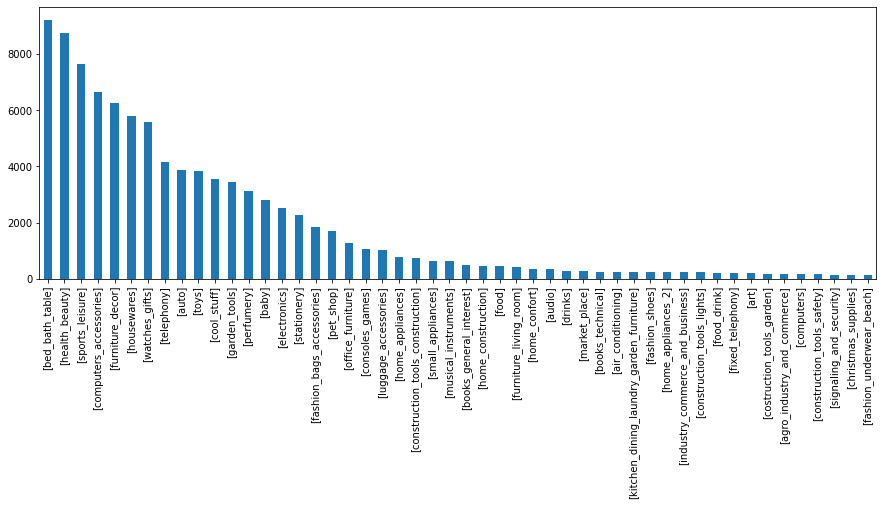

In [68]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [69]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

# Print length of transactions.
len(transactions)

97256

In [70]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]
# Print median number of items in a transaction.
np.median(counts)

1.0

In [71]:
# Print maximum number of items in a transaction.
np.max(counts)

3

# Association Rules and Metrics

In [72]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# Print header.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Compute the support metric


In [73]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

agro_industry_and_commerce    0.001871
air_conditioning              0.002601
art                           0.002077
arts_and_craftmanship         0.000236
audio                         0.003599
                                ...   
stationery                    0.023762
tablets_printing_image        0.000812
telephony                     0.043175
toys                          0.039956
watches_gifts                 0.057827
Length: 71, dtype: float64

# Compute the item count distribution over transactions

In [74]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    96530
2      711
3       15
dtype: int64

# Create a column for an itemset with multiple items


In [75]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

0.00014394998766142962

# **Aggregate the dataset further by combining product sub-categories**
We can use the inclusive OR operation to combine multiple categories.
* True | True = True
* True | False = True
* False | True = True
* False | False = False

In [76]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

# Compute the confidence metric


In [77]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [78]:
# Print confidence for health_beauty -> sports_leisure.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

# The Apriori Algorithm and Pruning

In [79]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.040070,(5)
1,0.029664,(6)
2,0.096827,(7)
3,0.068777,(15)
4,0.010920,(16)
5,0.037345,(20)
6,0.026219,(26)
7,0.019166,(28)
8,0.066310,(39)
9,0.036173,(42)


In [80]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.003599,(audio)
4,0.040070,(auto)
5,0.029664,(baby)
6,0.096827,(bed_bath_table)
7,0.005264,(books_general_interest)
8,0.002673,(books_technical)
9,0.001316,(christmas_supplies)


In [81]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_craftmanship)
4,0.003599,(audio)
...,...,...
108,0.000051,"(stationery, luggage_accessories)"
109,0.000051,"(sports_leisure, watches_gifts)"
110,0.000144,"(sports_leisure, sports_leisure_health_beauty)"
111,0.000062,"(toys, stationery)"


In [82]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

# Computing association rules from Apriori output**

In [83]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head()

rules.to_csv('result_apriori.csv')

# Pruning association rules

In [84]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules
rules.to_csv('result_pruning.csv')

In [85]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


# The leverage metric


In [45]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(home_confort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


# Visualizing patterns in metrics

<AxesSubplot:xlabel='leverage', ylabel='confidence'>

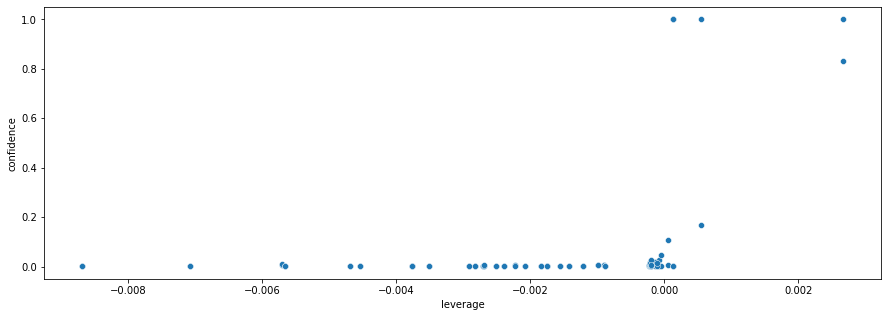

In [37]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

In [114]:
import json
import csv


# Convertion from CSV to JSON Standard format

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []

    # read csv file
    with open(csvFilePath, encoding='utf-8') as csvf:
        # load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf)

        # convert each csv row into python dict
        for row in csvReader:
            # add this python dict to json array
            jsonArray.append(row)

    # convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)

# s=input('Enter the File csv File Name to Convert ...:'.format(s))
# print(s)

# csvFilePath=r'/home/puran/Downloads/'+s
csvFilePath = r'/home/puran/Downloads/result_apriori.csv'
jsonFilePath = r'/home/puran/Downloads/result_apriori.json'
csv_to_json(csvFilePath, jsonFilePath)
